In [1]:
# install google chrome
!wget https://dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

--2022-06-08 09:57:13--  https://dl.google.com/linux/linux_signing_key.pub
Resolving dl.google.com (dl.google.com)... 74.125.26.91, 74.125.26.190, 74.125.26.136, ...
Connecting to dl.google.com (dl.google.com)|74.125.26.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12415 (12K) [application/octet-stream]
Saving to: ‘linux_signing_key.pub’

linux_signing_key.p 100%[===================>]  12.12K  --.-KB/s    in 0s      

2022-06-08 09:57:13 (67.2 MB/s) - ‘linux_signing_key.pub’ saved [12415/12415]

OK
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1811 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [6751 B]       
Get:3 http://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1097 B]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:5 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [279 kB]
Get:6 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5389

In [2]:
# install chromedriver
# !apt-get install -y qq unzip
!wget -O /tmp/chromedriver.zip http://chromedriver.storage.googleapis.com/`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`/chromedriver_linux64.zip
!unzip /tmp/chromedriver.zip chromedriver -d /usr/local/bin/

--2022-06-08 09:57:42--  http://chromedriver.storage.googleapis.com/102.0.5005.61/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 74.125.134.128, 2607:f8b0:400c:c00::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|74.125.134.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6221182 (5.9M) [application/zip]
Saving to: ‘/tmp/chromedriver.zip’

/tmp/chromedriver.z 100%[===================>]   5.93M  --.-KB/s    in 0.05s   

2022-06-08 09:57:45 (117 MB/s) - ‘/tmp/chromedriver.zip’ saved [6221182/6221182]

Archive:  /tmp/chromedriver.zip
  inflating: /usr/local/bin/chromedriver  


In [3]:
# install selenium
!sudo apt install -y python3-selenium
!pip install selenium==3.141.0 > /dev/null

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser chromium-chromedriver liblzo2-2 snapd
  squashfs-tools
Suggested packages:
  apparmor-profiles-extra apparmor-utils zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver liblzo2-2 python3-selenium
  snapd squashfs-tools
0 upgraded, 7 newly installed, 0 to remove and 28 not upgraded.
Need to get 35.1 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 apparmor amd64 2.13.3-7ubuntu5.1 [494 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 liblzo2-2 amd64 2.10-2 [50.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 squashfs-tools amd64 1:4.4-1ubuntu0.3 [117 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 snapd amd

In [4]:
# To check Chrome Driver's version
!chromedriver -v

ChromeDriver 102.0.5005.61 (0e59bcc00cc4985ce39ad31c150065f159d95ad3-refs/branch-heads/5005@{#819})


In [119]:
! pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.1 MB/s eta 0:00:00a 0:00:01


In [98]:
# import libraries
import time
from PIL import Image


from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pandas as pd
import numpy as np
import re

In [24]:
# creating the driver object and loading the url

url = 'https://www.amazon.in/'

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument("--disable-notifications")
driver = webdriver.Chrome(options=chrome_options)
driver.get(url)

In [25]:
# Searching For Smart Watches

driver.find_element_by_xpath('//input[@id="twotabsearchtextbox"]').send_keys('smart watch')
driver.find_element_by_xpath('//input[@id="nav-search-submit-button"]').click()

In [26]:
arr = []

for n in range(20):
    
    print(f'Page : {n} : ', end=' ')
    
    # waiting for next button to be clickable
    wait = WebDriverWait(driver,10)
    nxt_btn = wait.until(EC.element_to_be_clickable((By.XPATH,'//a[text() = "Next"]')))
    
    # Links to go to page of each individual product
    links = driver.find_elements_by_xpath('//div[@class="a-section aok-relative s-image-fixed-height"]//parent::a')

    temp = 1
    for l in links:    
        l.click() #clicking on each product
        driver.switch_to.window(driver.window_handles[1]) # focusing on product tab

        prod_info_dict = {}

        
        # Product Details
        
        prod_info_dict['Product Title'] = driver.find_element_by_xpath('//span[@id="productTitle"]').text.strip()
        try:
            prod_info_dict['Product Price'] = driver.find_element_by_xpath('//div[@id="centerCol"]//descendant::span[@class="a-price-whole"]').text.strip()
            prod_info_dict['Customer Review'] = driver.find_element_by_xpath('//div[@id="centerCol"]//descendant::span[@class="a-icon-alt"]').text.strip()
            prod_info_dict['Number Of Ratings'] = driver.find_element_by_xpath('//div[@id="centerCol"]//descendant::span[@id="acrCustomerReviewText"]').text.strip()
        except:
            pass
        
        # Technical Details Table
        rows = len(driver.find_elements_by_xpath('//table[@id="productDetails_techSpec_section_1"]//child::tr'))
        for i in range(rows):
            key = driver.find_element_by_xpath('//table[@id="productDetails_techSpec_section_1"]//child::tr['+str(i+1)+']//child::th[1]').text.strip()
            value = driver.find_element_by_xpath('//table[@id="productDetails_techSpec_section_1"]//child::tr['+str(i+1)+']//child::td[1]').text.strip()
            prod_info_dict[key] = value

        # Additional Information Table
        rows = len(driver.find_elements_by_xpath('//table[@id="productDetails_detailBullets_sections1"]//child::tr'))
        for i in range(rows):
            key = driver.find_element_by_xpath('//table[@id="productDetails_detailBullets_sections1"]//child::tr['+str(i+1)+']//child::th[1]').text.strip()
            if i !=1:
                value = driver.find_element_by_xpath('//table[@id="productDetails_detailBullets_sections1"]//child::tr['+str(i+1)+']//child::td[1]').text.strip()
            else:
                continue
            prod_info_dict[key] = value

        # Appending to arr
        arr.append(prod_info_dict)
        print(f'{temp}---',end='>')
        temp += 1

        # Closing current tab and returning to parent tab
        driver.close()
        driver.switch_to.window(driver.window_handles[0])
        
    # Going To Next Page
    nxt_btn.click()
    print(' ')

Page : 0 :  1--->2--->3--->4--->5--->6--->7--->8--->9--->10--->11--->12--->13--->14--->15--->16--->17--->18--->19--->20--->21--->22---> 
Page : 1 :  1--->2--->3--->4--->5--->6--->7--->8--->9--->10--->11--->12--->13--->14--->15--->16--->17--->18--->19--->20--->21--->22---> 
Page : 2 :  1--->2--->3--->4--->5--->6--->7--->8--->9--->10--->11--->12--->13--->14--->15--->16--->17--->18--->19--->20--->21--->22---> 
Page : 3 :  1--->2--->3--->4--->5--->6--->7--->8--->9--->10--->11--->12--->13--->14--->15--->16--->17--->18--->19--->20--->21--->22---> 
Page : 4 :  1--->2--->3--->4--->5--->6--->7--->8--->9--->10--->11--->12--->13--->14--->15--->16--->17--->18--->19--->20--->21--->22---> 
Page : 5 :  1--->2--->3--->4--->5--->6--->7--->8--->9--->10--->11--->12--->13--->14--->15--->16--->17--->18--->19--->20--->21--->22---> 
Page : 6 :  1--->2--->3--->4--->5--->6--->7--->8--->9--->10--->11--->12--->13--->14--->15--->16--->17--->18--->19--->20--->21--->22---> 
Page : 7 :  1--->2--->3--->4--->5--->6---

TimeoutException: Message: 


In [27]:
len(arr)

418

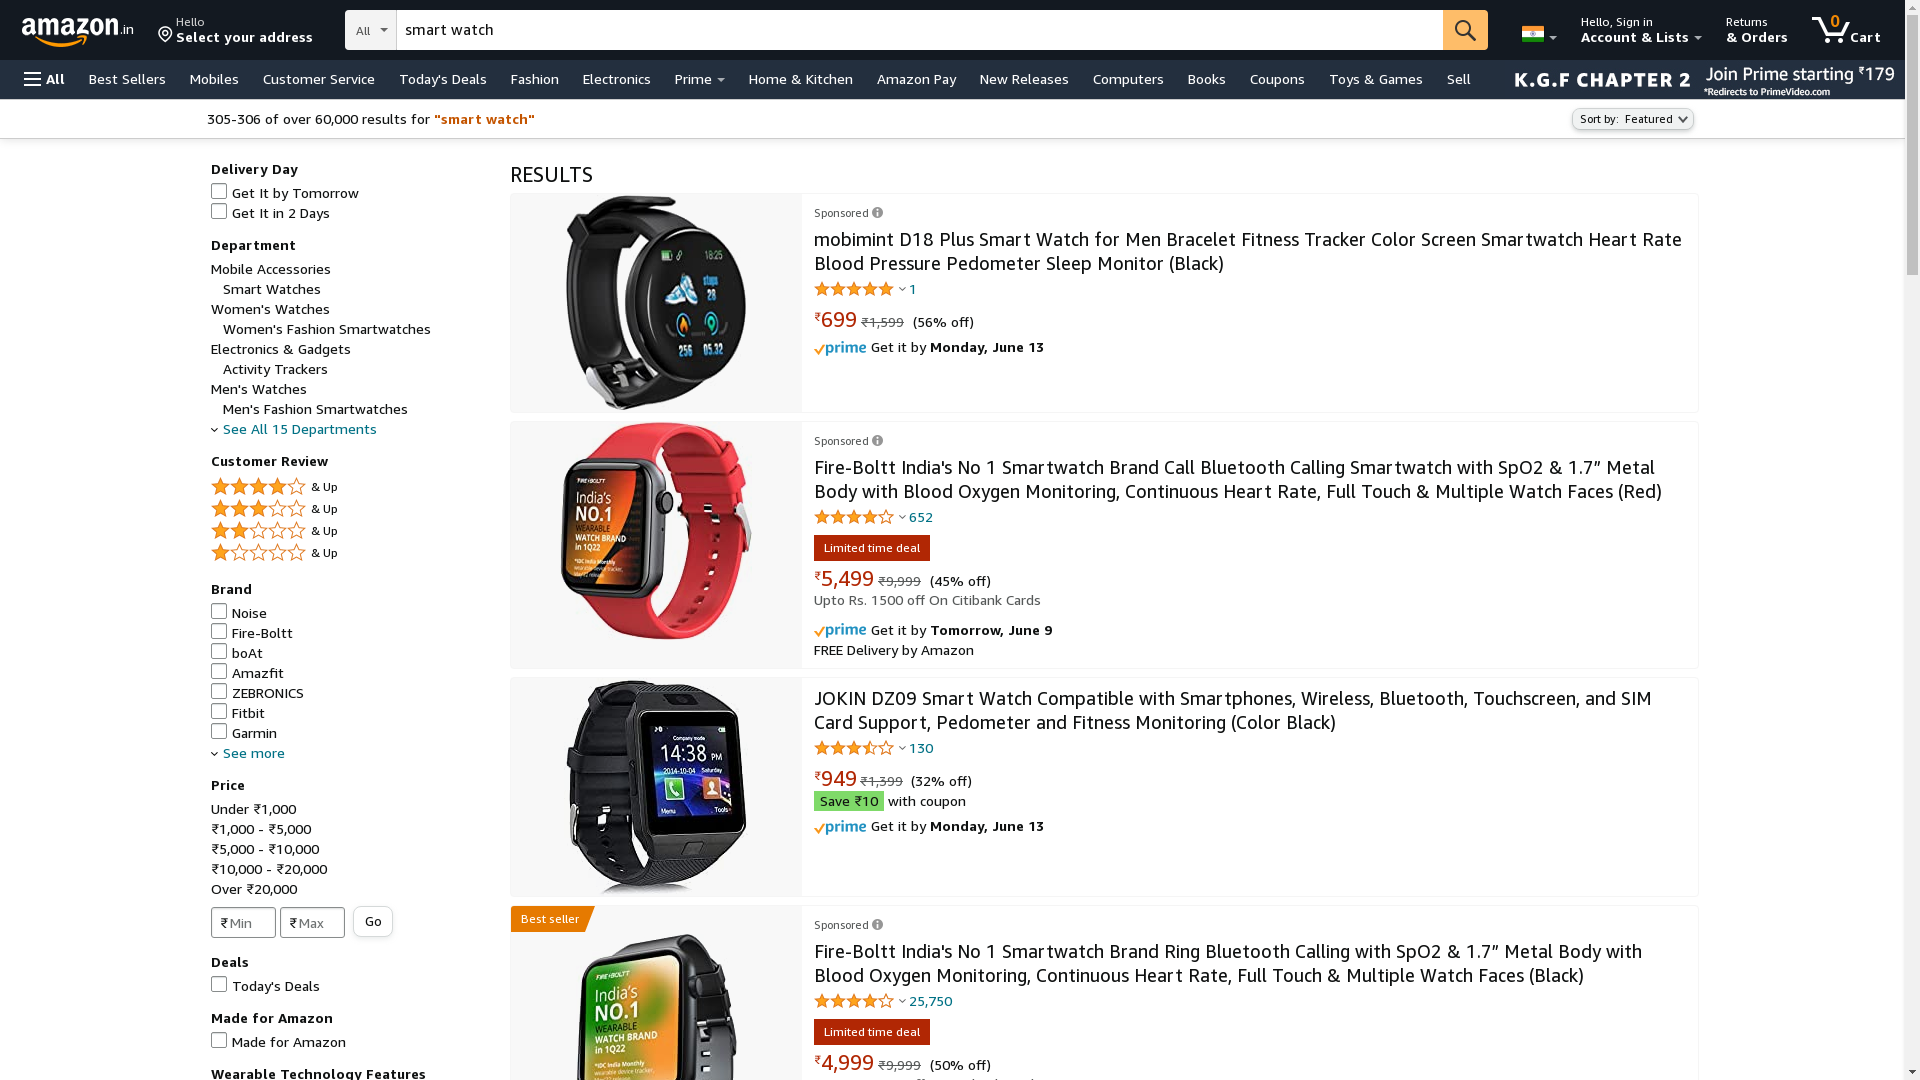

In [28]:
# take a picture
driver.save_screenshot('result.png')
img = Image.open('result.png')
img

In [10]:
# driver.quit()

# Creating Dataframe

In [29]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [30]:
# creating Datatframe

df = pd.DataFrame(arr)
df.shape

(418, 90)

In [31]:
df.head()

,Product Title,Brand,Manufacturer,Model,Model Name,Product Dimensions,Item model number,Compatible Devices,Special Features,Mounting Hardware,Number Of Items,Batteries Required,Wireless Type,Connector Type,Country of Origin,Item Weight,ASIN,Packer,Importer,Item Dimensions LxWxH,Net Quantity,Generic Name,Batteries,Operating System,Standing screen display size,Battery Average Life,Batteries Included,Battery Cell Composition,Battery Power Rating,Device interface - primary,Includes Rechargable Battery,Best Sellers Rank,Date First Available,Charging Time,Imported By,Resolution,Display Type,Product Price,Customer Review,Number Of Ratings,Item part number,Model Year,Material,Package Dimensions,Wattage,Power Source,Display Technology,Battery Description,Ink Colour,Has Auto Focus,Programmable Buttons,Department,Included Components,Image Stabilization,Speaker Connectivity,Series,Colour,Item Height,Item Width,Average Battery Life (in hours),Are Batteries Included,Lithium Battery Energy Content,Connectivity Type,Number Of Lithium Ion Cells,RAM Size,Response Time,Refresh Rate,Total Usb Ports,Wireless Carrier,Lithium Battery Weight,Number of Lithium Metal Cells,Form Factor,Microphone Technology,Colour Screen,Contains Liquid Contents,Age Range,Color,Compatible with,Display Size,Hand Orientation,Shape,Material Type,Season,Features,Sport,Style,Cable Type,Memory Storage Capacity,Voltage,Hardware Platform
0,Noise ColorFit Pulse Buzz Bluetooth Calling Sm...,Noise,Nexxbase Marketing Pvt. Ltd,Wrb-sw-colorfitpulsebuzz-std-grn_grn,ColorFit Pulse Buzz,4.7 x 3.9 x 1.2 cm; 45 Grams,wrb-sw-colorfitpulsebuzz-std-grn_grn,Smartphone,Bluetooth,"Smartwatch, Magnetic Charger, User Manual, War...",1,No,Bluetooth,USB,China,45 g,B09P1765VX,"Nexxbase Marketing Pvt. Ltd, Khasra No-146/25/...","Nexxbase Marketing Pvt. Ltd, Khasra No-146/25/...",47 x 39 x 12 Millimeters,1 Piece,Smartwatch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Fire-Boltt Ninja Calling 1.69"" Full Touch Blue...",Fire-Boltt,Boltt Games Pvt Ltd,BSW024,Ninja Calling,4.4 x 3.6 x 1.2 cm; 40 Grams,BSW024,"Tablet, Smartphone","Multi Sports Tracker, Music Player, Notificati...","1 Smartwatch, 1 Manual, 1 Magnetic Charger, 1 ...",1,Yes,Bluetooth,Bluetooth,China,40 g,B09RKJRCFM,Boltt Games Pvt Ltd,Savex Technologies Pvt Ltd,44 x 36 x 12 Millimeters,1 Piece,Smartwatch,1 Lithium Ion batteries required. (included),"Android 4.4 (contain), IOS 8.0 (contain) above",1.69 Inches,7 Days,Yes,Lithium Ion,260,"Touchscreen, Buttons",Yes,"#1,391 in Electronics (See Top 100 in Electron...",23 February 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",BoAt,Imagine Marketing Ltd,8904130868054,NaN,26 x 5 x 1 cm; 54 Grams,8904130868054,NaN,"Sleep Monitor, Heart Rate Monitor","USB Magnetic Charging Cable, User Manual, Warr...",4,Yes,NaN,NaN,China,54 g,B096VF5YYF,Imagine Marketing Ltd,Imagine Marketing Ltd,26 x 5 x 1 Centimeters,1 Piece,Watch Xtend,1 Lithium Ion batteries required. (included),Smartwatch,NaN,NaN,Yes,Lithium,NaN,NaN,Yes,#61 in Electronics (See Top 100 in Electronics...,14 June 2021,2 Hours,Imagine Marketing Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noise ColorFit Pulse Grand Smart Watch with 1....,Noise,Noise,Wrb-sw-colorfitgrand-std-blk_blk,ColorFit Grand,4.7 x 3.9 x 1.2 cm; 45 Grams,wrb-sw-colorfitgrand-std-blk_blk,Smartphone,NaN,"Smartwatch, Magnetic Charger, User Manua

In [32]:
# statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 90 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Product Title                    418 non-null    object
 1   Brand                            400 non-null    object
 2   Manufacturer                     398 non-null    object
 3   Model                            285 non-null    object
 4   Model Name                       270 non-null    object
 5   Product Dimensions               314 non-null    object
 6   Item model number                295 non-null    object
 7   Compatible Devices               333 non-null    object
 8   Special Features                 352 non-null    object
 9   Mounting Hardware                310 non-null    object
 10  Number Of Items                  279 non-null    object
 11  Batteries Required               235 non-null    object
 12  Wireless Type                    286

# Data Cleaning And Feature Extraction

In [34]:
# Percentage of Null Values in each columns

null_percent = df.isnull().mean()*100
null_percent

Product Title                       0.000000
Brand                               4.306220
Manufacturer                        4.784689
Model                              31.818182
Model Name                         35.406699
Product Dimensions                 24.880383
Item model number                  29.425837
Compatible Devices                 20.334928
Special Features                   15.789474
Mounting Hardware                  25.837321
Number Of Items                    33.253589
Batteries Required                 43.779904
Wireless Type                      31.578947
Connector Type                     16.507177
Country of Origin                   6.220096
Item Weight                        21.052632
ASIN                                3.588517
Packer                             39.712919
Importer                           43.540670
Item Dimensions LxWxH              24.401914
Net Quantity                       31.578947
Generic Name                       25.837321
Batteries 

In [43]:
# Removing those columns haveing NULL values more than 70% NULL values

cols = null_percent[null_percent>70].index
df2 = df.drop(cols,axis = 1)

In [122]:
df3 = df2.copy()

# Removing weight from Product Dimentions, as it has its separate column
# Also separating, length, bredth and height of the product into separate  columns

product_length_in_cm = []
product_width_in_cm = []
product_height_in_cm = []

for i in df2['Product Dimensions']:
    
    if pd.isna(i):
        product_length_in_cm.append(np.nan)
        product_width_in_cm.append(np.nan)
        product_height_in_cm.append(np.nan)
    
    else:
        prod_dim = re.findall('\d.\d*',i)
        
        product_length_in_cm.append(float(prod_dim[0]))
        product_width_in_cm.append(float(prod_dim[1]))
        product_height_in_cm.append(float(prod_dim[2]))
        
df3['product_length_in_cm'] = product_length_in_cm
df3['product_width_in_cm'] = product_width_in_cm
df3['product_height_in_cm'] = product_height_in_cm

# Converting type of Number Of Items from Object to Numerical

No_Of_Items = []

for i in df2['Number Of Items']:
    if pd.isna(i):
        No_Of_Items.append(np.nan)
    else:
        No_Of_Items.append(float(i.strip()))
        
df3['No_Of_Items'] = No_Of_Items

# Converting type of Item Weight from Object to Numerical and removing 'g' at the end

Item_Weight_in_gm = []

for i in df2['Item Weight']:
    if pd.isna(i):
        Item_Weight_in_gm.append(np.nan)
    else:
        Item_Weight_in_gm.append(float(re.findall('\d+',string)[0]))
        
df3['Item_Weight_in_gm'] = Item_Weight_in_gm

# Converting type of Net Quantity from Object to Numerical and removing 'Piece' at the end

Net_Quantity = []

for i in df2['Net Quantity']:
    if pd.isna(i):
        Net_Quantity.append(np.nan)
    else:
        Net_Quantity.append(float(re.findall('\d+',string)[0]))
        
df3['Net_Quantity'] = Net_Quantity

# Converting type of Standing screen display size from Object to Numerical and removing 'inches' at the end

Standing_screen_display_size_in_inches = []

for i in df2['Standing screen display size']:
    if pd.isna(i):
        Standing_screen_display_size_in_inches.append(np.nan)
    else:
        Standing_screen_display_size_in_inches.append(float(re.findall('\d+',string)[0]))
        
df3['Standing_screen_display_size_in_inches'] = Standing_screen_display_size_in_inches

# Converting type of Battery Average Life from Object to Numerical and removing 'days' at the end

Battery_Average_Life_in_days = []

for i in df2['Battery Average Life']:
    if pd.isna(i):
        Battery_Average_Life_in_days.append(np.nan)
    else:
        Battery_Average_Life_in_days.append(float(re.findall('\d+',string)[0]))
        
df3['Battery_Average_Life_in_days'] = Battery_Average_Life_in_days

# Converting type of Product Price from Object to Numerical 

Product_Price_in_rupees = []

for i in df2['Product Price']:
    if pd.isna(i):
        Product_Price_in_rupees.append(np.nan)
    else:
        Product_Price_in_rupees.append(float(re.findall('\d+',string)[0]))
        
df3['Product_Price_in_rupees'] = Product_Price_in_rupees

# Converting type of Number Of Ratings from Object to Numerical and removing 'ratings' at the end

Number_Of_Ratings = []

for i in df2['Number Of Ratings']:
    if pd.isna(i):
        Number_Of_Ratings.append(np.nan)
    else:
        Number_Of_Ratings.append(float(re.findall('\d+',string)[0]))
        
df3['Battery_Average_Life_in_days'] = Number_Of_Ratings

# Removing Reduntant Coluns

df3.drop('Product Dimensions',axis = 1, inplace=True)
df3.drop('Number Of Items',axis = 1, inplace=True)
df3.drop('Item Weight',axis = 1, inplace=True)
df3.drop('Item Dimensions LxWxH',axis = 1, inplace=True)
df3.drop('Net Quantity',axis = 1, inplace=True)
df3.drop('Standing screen display size',axis = 1, inplace=True)
df3.drop('Battery Average Life',axis = 1, inplace=True)
df3.drop('Product Price',axis = 1, inplace=True)
df3.drop('Customer Review',axis = 1, inplace=True)
df3.drop('Number Of Ratings',axis = 1, inplace=True)

In [123]:
df3.head()

,Product Title,Brand,Manufacturer,Model,Model Name,Item model number,Compatible Devices,Special Features,Mounting Hardware,Batteries Required,Wireless Type,Connector Type,Country of Origin,ASIN,Packer,Importer,Generic Name,Batteries,Operating System,Batteries Included,Battery Cell Composition,Device interface - primary,Includes Rechargable Battery,Best Sellers Rank,Date First Available,product_length_in_cm,product_width_in_cm,product_height_in_cm,No_Of_Items,Item_Weight_in_gm,Net_Quantity,Standing_screen_display_size_in_inches,Battery_Average_Life_in_days,Product_Price_in_rupees
0,Noise ColorFit Pulse Buzz Bluetooth Calling Sm...,Noise,Nexxbase Marketing Pvt. Ltd,Wrb-sw-colorfitpulsebuzz-std-grn_grn,ColorFit Pulse Buzz,wrb-sw-colorfitpulsebuzz-std-grn_grn,Smartphone,Bluetooth,"Smartwatch, Magnetic Charger, User Manual, War...",No,Bluetooth,USB,China,B09P1765VX,"Nexxbase Marketing Pvt. Ltd, Khasra No-146/25/...","Nexxbase Marketing Pvt. Ltd, Khasra No-146/25/...",Smartwatch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.70,3.90,1.20,1.0,45.0,45.0,NaN,NaN,NaN
1,"Fire-Boltt Ninja Calling 1.69"" Full Touch Blue...",Fire-Boltt,Boltt Games Pvt Ltd,BSW024,Ninja Calling,BSW024,"Tablet, Smartphone","Multi Sports Tracker, Music Player, Notificati...","1 Smartwatch, 1 Manual, 1 Magnetic Charger, 1 ...",Yes,Bluetooth,Bluetooth,China,B09RKJRCFM,Boltt Games Pvt Ltd,Savex Technologies Pvt Ltd,Smartwatch,1 Lithium Ion batteries required. (included),"Android 4.4 (contain), IOS 8.0 (contain) above",Yes,Lithium Ion,"Touchscreen, Buttons",Yes,"#1,391 in Electronics (See Top 100 in Electron...",23 February 2022,4.40,3.60,1.20,1.0,45.0,45.0,45.0,NaN,NaN
2,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",BoAt,Imagine Marketing Ltd,8904130868054,NaN,8904130868054,NaN,"Sleep Monitor, Heart Rate Monitor","USB Magnetic Charging Cable, User Manual, Warr...",Yes,NaN,NaN,China,B096VF5YYF,Imagine Marketing Ltd,Imagine Marketing Ltd,Watch Xtend,1 Lithium Ion batteries required. (included),Smartwatch,Yes,Lithium,NaN,Yes,#61 in Electronics (See Top 100 in Electronics...,14 June 2021,26.00,5.00,1.00,4.0,45.0,45.0,NaN,NaN,NaN
3,Noise ColorFit Pulse Grand Smart Watch with 1....,Noise,Noise,Wrb-sw-colorfitgrand-std-blk_blk,ColorFit Grand,wrb-sw-colorfitgrand-std-blk_blk,Smartphone,NaN,"Smartwatch, Magnetic Charger, User Manual, War...",No,NaN,USB,China,B09NVPSCQT,"Nexxbase Marketing Pvt. Ltd, Khasra No-146/25/...","Nexxbase Marketing Pvt. Ltd, Khasra No-146/25/...",Smartwatch,NaN,Android,NaN,NaN,NaN,NaN,#24 in Electronics (See Top 100 in Electronics...,18 February 2022,4.70,3.90,1.20,1.0,45.0,45.0,45.0,NaN,NaN
4,Noise ColorFit Pulse Spo2 Smart Watch with 10 ...,Noise,TSL,Wrb-sw-colorfitpulse-std-blk_blk,ColorFit Pulse,wrb-sw-colorfitpulse-std-blk_blk,Smartphone,"Heart Rate Monitor, Sleep & Step Tracking, 8 S...","Smartwatch, Magnetic Charger, User Manual, War...",No,NaN,NaN,China,B097R25DP7,"Nexxbase Marketing Pvt. Ltd., Khasra No-146/25...","Nexxbase Marketing Pvt. Ltd., Khasra No-146/25...",Smart Watch,NaN,Smartwatch,Yes,Lithium Polymer,NaN,NaN,#34 in Electronics (See Top 100 in Electronics...,21 July 2021,4.32,3.88,1.08,4.0,45.0,45.0,45.0,NaN,NaN


# Dumping Data In Excel File

In [125]:
df3.to_excel('Smart_Watches_Scraped_Data_Amazon.xlsx',index=False)